# Hipótesis

### Escribe tu hipótesis principal en Markdown

- hipotesis_1 = "La presencia de los coches de combustion predomina frente a los coches electricos"

- hipotesis_2 = "Hay mayor porcentaje de coches híbridos frente a coches eléctricos"
- hipotesis_3 = "La evulución del mercado tendrá una transicion notable por el - tipo de combustible en futuros años"
- hipotesis_4 = "La presencia de los coches hibridos y electricos es mayor en Madrid y Barcelona"
- hipotesis_5 = "En las princpipales ciudades de España los precios son más elevados"
- hipotesis_6 = "El kilometraje de los coches afecta directamente al nivel de precios"
- hipotesis_7 = "El nombre de la marca de los coches afecta al precio"
- hipotesis_8 = "La tendencia de los anuncios se ve marcada por la marca del vehículo"

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
df_final = pd.read_csv("data/df_final.csv")

1 y 2

In [116]:
coches_por_combustible = df_final['Fuel'].value_counts()
total_coches = len(df_final)
porcentajes_combustible = (coches_por_combustible / total_coches) * 100
print("Porcentaje de coches por tipo de combustible:")
print(porcentajes_combustible)

Porcentaje de coches por tipo de combustible:
Fuel
Diésel                60.288285
Gasolina              33.808165
Híbrido                2.834478
Eléctrico              1.339847
Híbrido enchufable     1.233433
Gas licuado (GLP)      0.275709
Gas natural (CNG)      0.220083
Name: count, dtype: float64


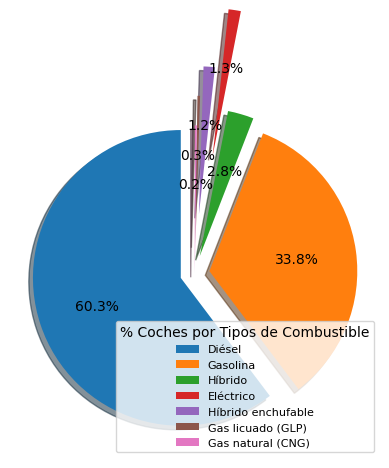

In [117]:
myexplode = [0.1, 0.1, 0.12, 0.8, 0.4, 0.2, 0]
fig, ax = plt.subplots()
ax.pie(coches_por_combustible, labels=[''] * len(coches_por_combustible.index), autopct='%1.1f%%', startangle=90, explode=myexplode, shadow=True, labeldistance=1.3)
ax.legend(coches_por_combustible.index, title= "% Coches por Tipos de Combustible", loc="lower right",prop={"size": 8});


2

In [118]:
coches_por_año_combustible = df_final.groupby(['Year', 'Fuel']).size().unstack(fill_value=0)

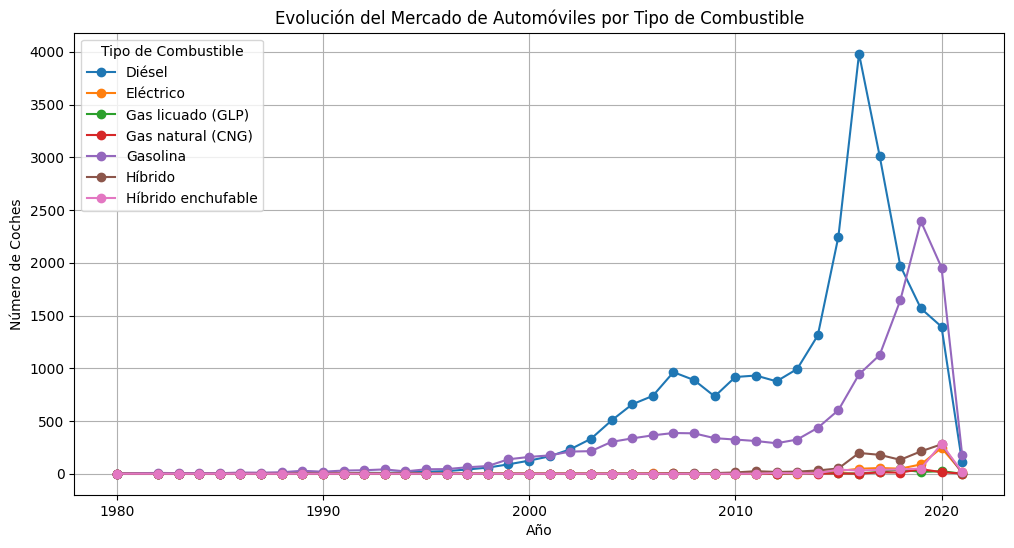

In [119]:
coches_por_año_combustible.plot(kind='line', marker='o', figsize=(12, 6))

plt.title("Evolución del Mercado de Automóviles por Tipo de Combustible")
plt.xlabel("Año")
plt.ylabel("Número de Coches")
plt.legend(title="Tipo de Combustible")
plt.grid(True);


4

In [121]:
coches_hibridos_electricos = df_final[df_final['Fuel'].isin(['Híbrido enchufable', 'Eléctrico'])]
conteo_ciudades_combustible = coches_hibridos_electricos.groupby(['Province', 'Fuel']).size().unstack(fill_value=0)

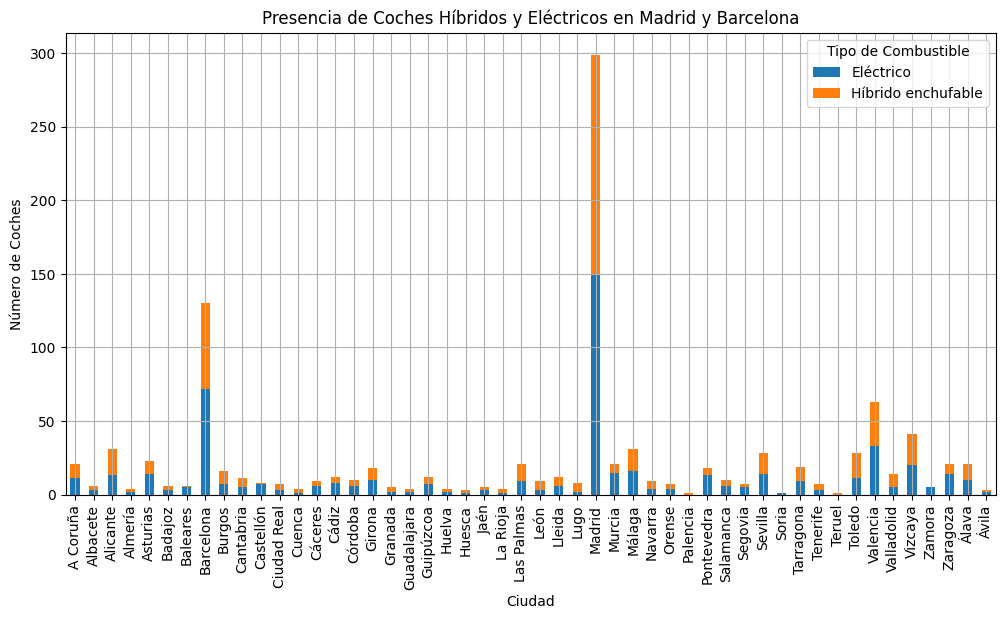

In [122]:
conteo_ciudades_combustible.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Presencia de Coches Híbridos y Eléctricos en Madrid y Barcelona")
plt.xlabel("Ciudad")
plt.ylabel("Número de Coches")
plt.legend(title="Tipo de Combustible")
plt.grid(True);



5

In [123]:
ciudades_principales = ["Madrid", "Barcelona"]
coches_ciudades_principales = df_final[df_final['Province'].isin(ciudades_principales)]

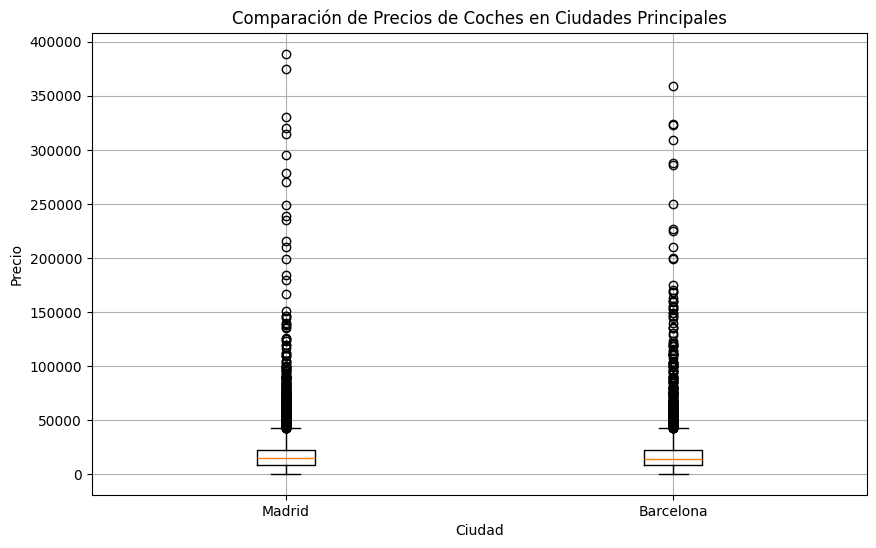

In [125]:

ciudades_principales = ["Madrid", "Barcelona"]
coches_ciudades_principales = df_final[df_final['Province'].isin(ciudades_principales)]

plt.figure(figsize=(10, 6))
plt.boxplot([coches_ciudades_principales[coches_ciudades_principales['Province'] == 'Madrid']['Price'],
             coches_ciudades_principales[coches_ciudades_principales['Province'] == 'Barcelona']['Price']],
            labels=ciudades_principales)
plt.title("Comparación de Precios de Coches en Ciudades Principales")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.grid(True);

In [128]:
df_madrid_barcelona = df_final[df_final['Province'].isin(['Madrid', 'Barcelona'])]

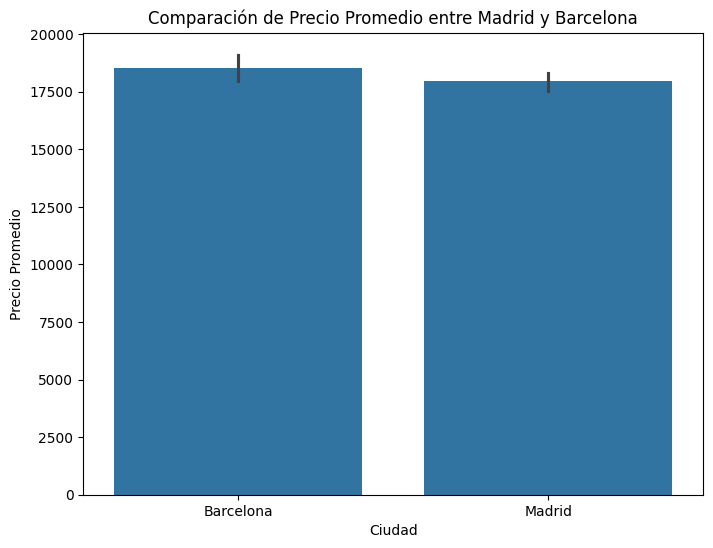

In [127]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Province', y='Price', data=df_madrid_barcelona)
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precio Promedio entre Madrid y Barcelona');


5

7

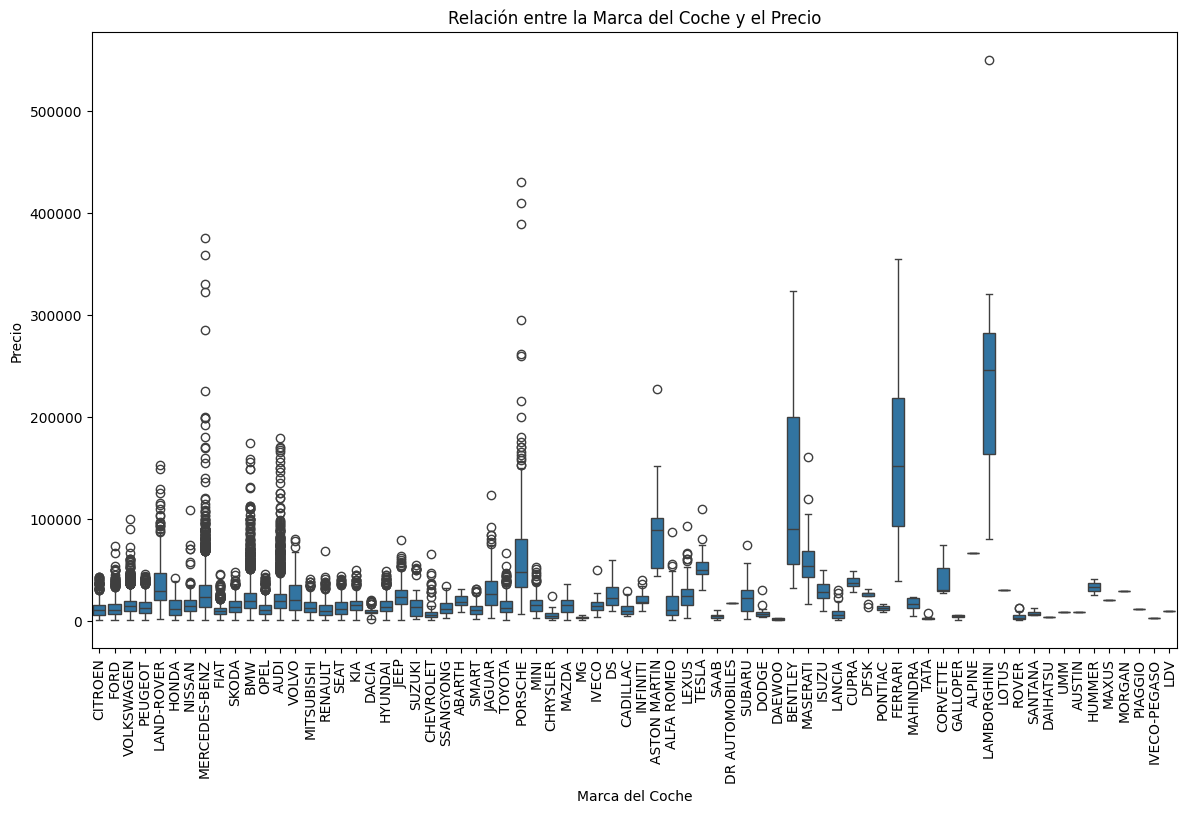

In [105]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Car brand', y='Price', data=df_final)
plt.title('Relación entre la Marca del Coche y el Precio')
plt.xlabel('Marca del Coche')
plt.ylabel('Precio')
plt.xticks(rotation=90)  
plt.show()

In [129]:
precio_promedio_por_marca = df_final.groupby('Car brand')['Price'].mean().sort_values(ascending=False)


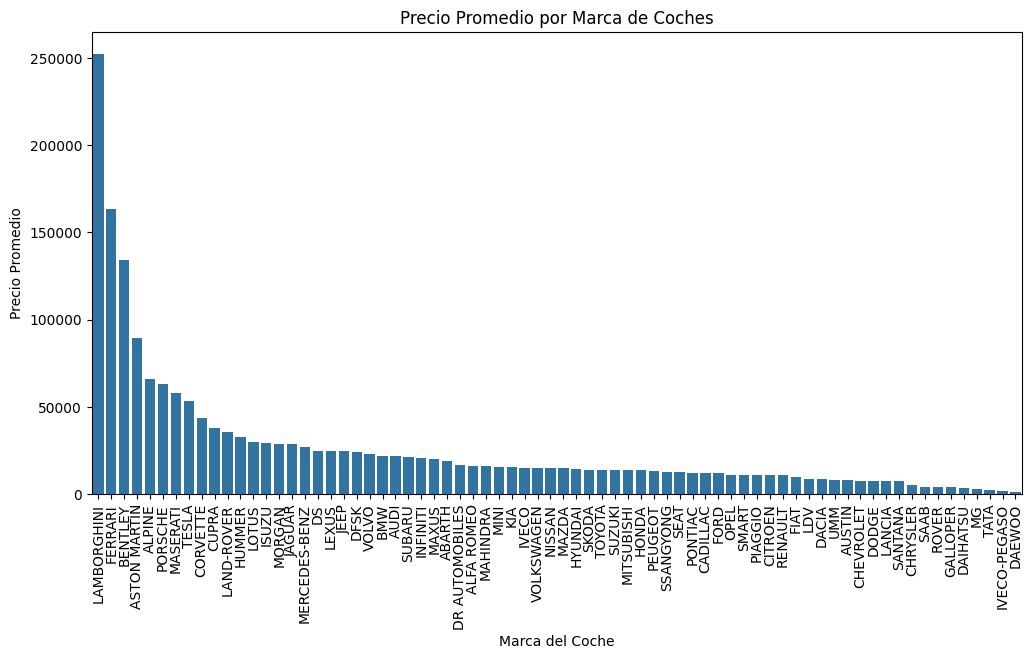

In [131]:

precio_promedio_por_marca = df_final.groupby('Car brand')['Price'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=precio_promedio_por_marca.index, y=precio_promedio_por_marca.values)
plt.title("Precio Promedio por Marca de Coches")
plt.xlabel("Marca del Coche")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90);


8